In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,load_model
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from tensorflow.keras.layers import BatchNormalization,SeparableConv2D,Dense,MaxPooling2D,Activation,Flatten,Dropout

In [ ]:
encoder=OneHotEncoder()
encoder.fit([[0],[1]])

OneHotEncoder()

In [ ]:
data=[]
paths=[]
result=[]
for r,d,f in os.walk('/content/drive/MyDrive/Dataset_Futura/Brain Tumour/no'):
  for file in f:
    if '.jpg' in file:
      paths.append(os.path.join(r,file))
for path in paths:
  img=Image.open(path)
  img=img.resize((128,128))
  img=np.array(img)
  if(img.shape==(128,128,3)):
    data.append(img)
    result.append(encoder.transform([[0]]).toarray())

In [ ]:
paths=[]

for r,d,f in os.walk('/content/drive/MyDrive/Dataset_Futura/Brain Tumour/yes'):
  for file in f:
    if '.jpg' in file:
      paths.append(os.path.join(r,file))
for path in paths:
  img=Image.open(path)
  img=img.resize((128,128))
  img=np.array(img)
  if(img.shape==(128,128,3)):
    data.append(img)
    result.append(encoder.transform([[1]]).toarray())

In [ ]:
data=np.array(data)
print(data.shape)
result=np.array(result)
result=result.reshape(139,2)
print(result.shape)

(139, 128, 128, 3)
(139, 2)


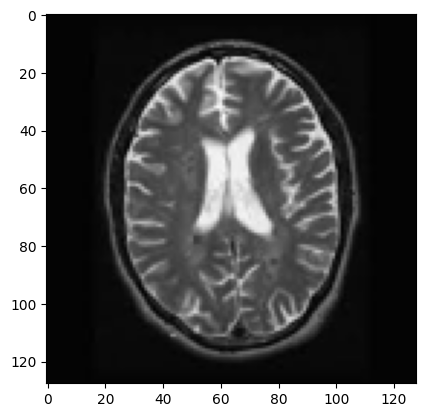

In [ ]:
plt.imshow(data[9])

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(data,result,test_size=0.2)

In [ ]:
model=Sequential()

model.add(SeparableConv2D(16,(7,7),padding="same",input_shape=(128,128,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(SeparableConv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(SeparableConv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(SeparableConv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(.5))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(.5))

model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d_12 (Separ  (None, 128, 128, 16)      211       
 ableConv2D)                                                     
                                                                 
 activation_18 (Activation)  (None, 128, 128, 16)      0         
                                                                 
 batch_normalization_18 (Ba  (None, 128, 128, 16)      64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 64, 64, 16)        0         
 ng2D)                                                           
                                                                 
 separable_conv2d_13 (Separ  (None, 64, 64, 32)        688       
 ableConv2D)                                          

In [ ]:
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
print(xtrain.shape)
print(ytrain.shape)

(111, 128, 128, 3)
(111, 2)


In [ ]:
history=model.fit(xtrain,ytrain,verbose=1,epochs=50,batch_size=128,validation_data=(xtest,ytest))

Epoch 1/50
1/1 [==============================] - 8s 8s/step - loss: 0.9469 - accuracy: 0.5315 - val_loss: 0.6829 - val_accuracy: 0.5714
Epoch 2/50
1/1 [==============================] - 5s 5s/step - loss: 0.6357 - accuracy: 0.8018 - val_loss: 0.6746 - val_accuracy: 0.5714
Epoch 3/50
1/1 [==============================] - 6s 6s/step - loss: 0.5771 - accuracy: 0.7838 - val_loss: 0.6722 - val_accuracy: 0.6786
Epoch 4/50
1/1 [==============================] - 5s 5s/step - loss: 0.4373 - accuracy: 0.8468 - val_loss: 0.6735 - val_accuracy: 0.6429
Epoch 5/50
1/1 [==============================] - 5s 5s/step - loss: 0.3973 - accuracy: 0.8649 - val_loss: 0.6756 - val_accuracy: 0.6429
Epoch 6/50
1/1 [==============================] - 6s 6s/step - loss: 0.3486 - accuracy: 0.9099 - val_loss: 0.6785 - val_accuracy: 0.6786
Epoch 7/50
1/1 [==============================] - 4s 4s/step - loss: 0.3250 - accuracy: 0.9189 - val_loss: 0.6825 - val_accuracy: 0.6071
Epoch 8/50
1/1 [=========================

In [ ]:
score=model.evaluate(xtest,ytest,batch_size=64)

1/1 [==============================] - 0s 388ms/step - loss: 0.6787 - accuracy: 0.5357


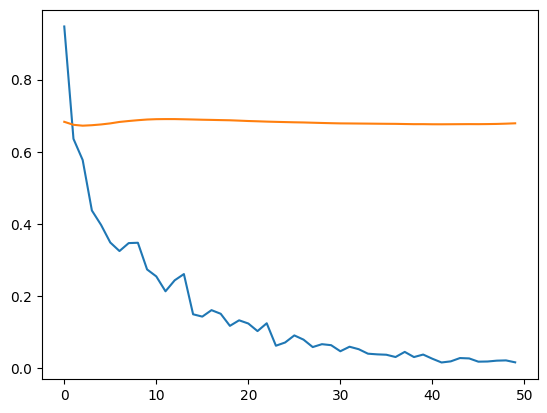

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
def detection(num):
  if(num==1):
    return 'Tumor present'
  else:
    return 'Tumor not present'


57.373130321502686Tumor not present


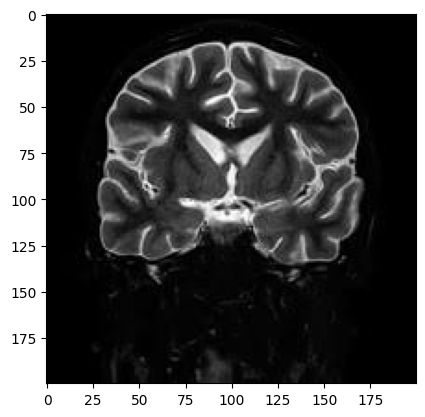

In [ ]:
img=Image.open('/content/drive/MyDrive/Dataset_Futura/Brain Tumour/no/19 no.jpg')
x=np.array(img.resize((128,128)))
x=x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification=np.where(res==np.amax(res))[1][0]
plt.imshow(img)
print(str(res[0][classification]*100)+detection(classification))

59.903669357299805Tumor present


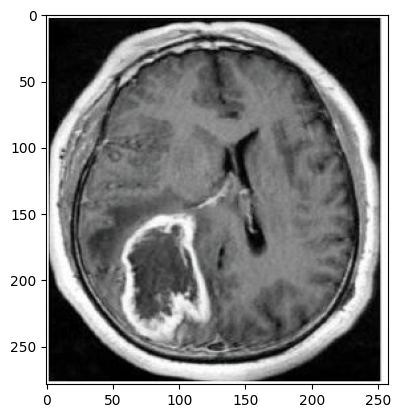

In [ ]:
img=Image.open('/content/drive/MyDrive/Dataset_Futura/Brain Tumour/yes/Y109.JPG')
x=np.array(img.resize((128,128)))
x=x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification=np.where(res==np.amax(res))[1][0]
plt.imshow(img)
print(str(res[0][classification]*100)+detection(classification))

50.59955716133118Tumor present


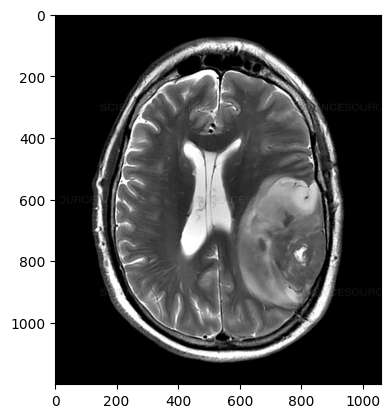

In [ ]:
img=Image.open('/content/drive/MyDrive/Dataset_Futura/Brain Tumour/yes/Y162.jpg')
x=np.array(img.resize((128,128)))
x=x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification=np.where(res==np.amax(res))[1][0]
plt.imshow(img)
print(str(res[0][classification]*100)+detection(classification))